In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

dataset info :

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

License: CC0: Public Domain

Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [16]:
dp=pd.read_csv('diabetes.csv')

In [17]:
dp.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
x=dp[dp.columns[:-1]].values
y=dp[dp.columns[-1]].values

In [20]:
scaler=StandardScaler()

x1=scaler.fit_transform(x)
data=np.hstack((x1,np.reshape(y,(-1,1))))
transformed_dp=pd.DataFrame(data, columns=dp.columns)

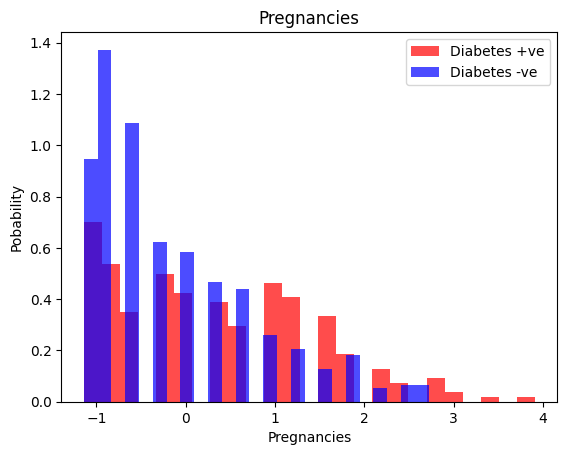

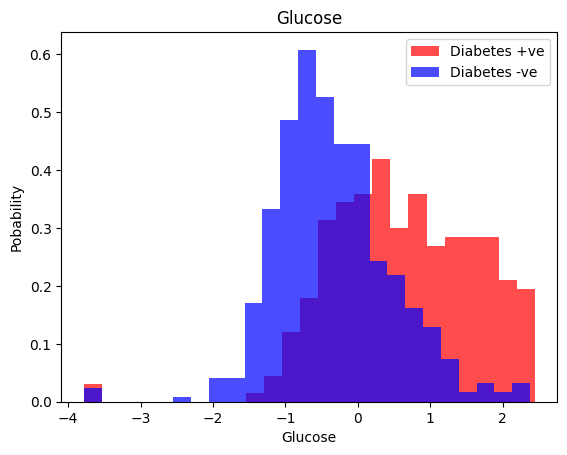

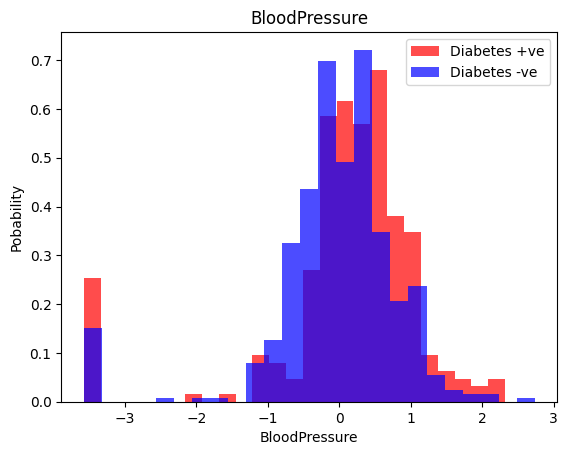

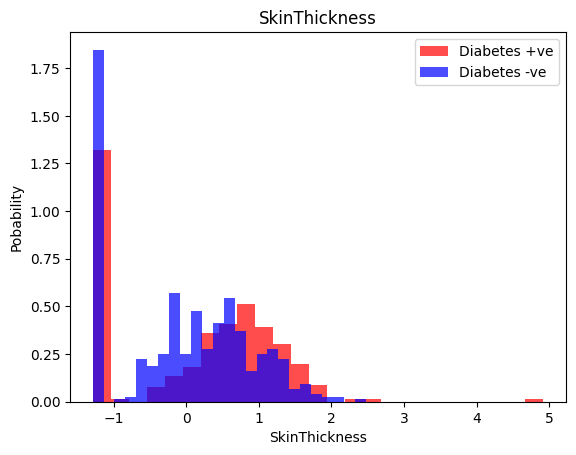

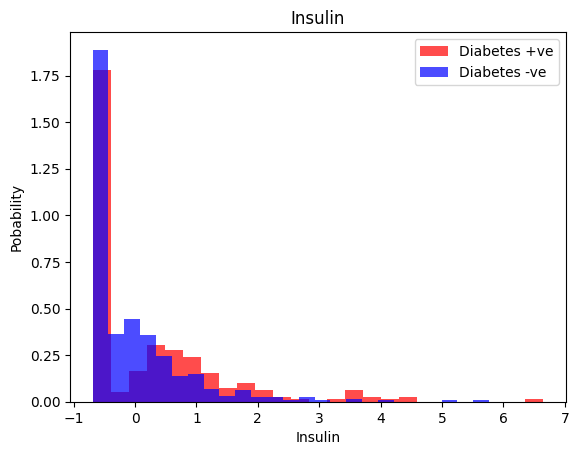

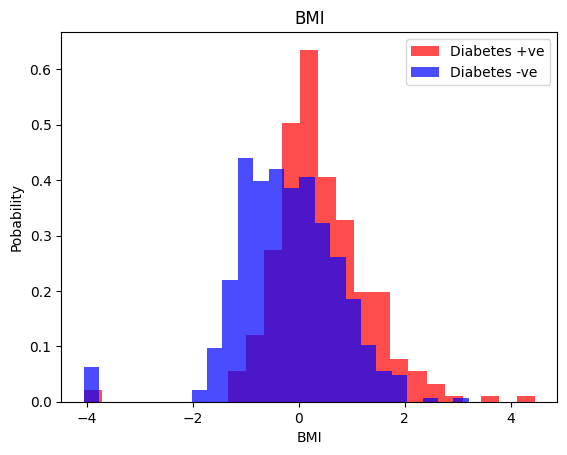

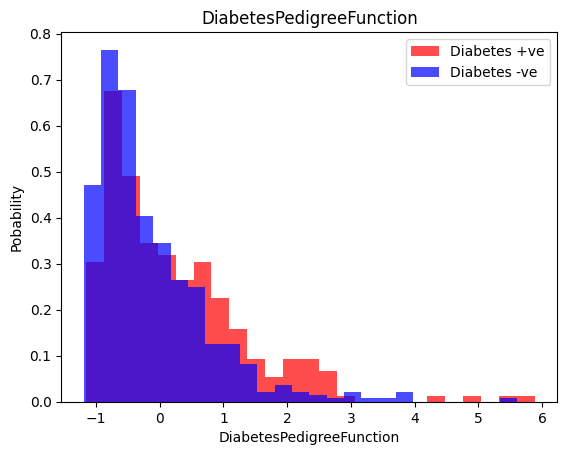

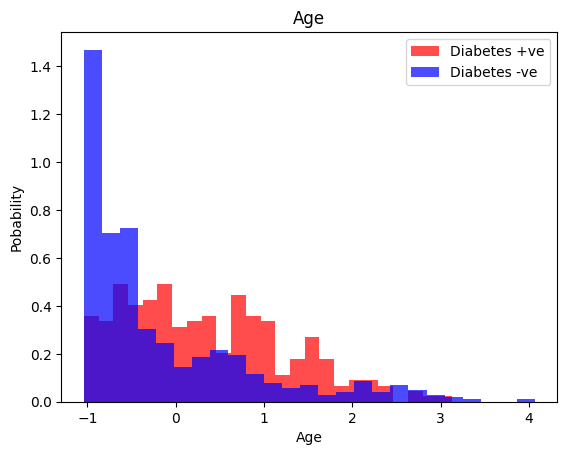

In [21]:
for i in range(len(dp.columns[:-1])):
    label=dp.columns[i]
    plt.hist(transformed_dp[transformed_dp['Outcome']==1][label],color='red', label='Diabetes +ve', alpha=0.7, density=True, bins=25)  #df[df['Outcome']==1]  dataframe where all the outcomes are one, aplha=0.5 makes it transparent
    plt.hist(transformed_dp[transformed_dp['Outcome']==0][label],color='blue', label='Diabetes -ve', alpha=0.7, density=True, bins=25)  ##df[df['Outcome']==0]  dataframe where all the outcomes are one, Density=Trues is used to noramlize the data
    plt.title(label)
    plt.ylabel('Pobability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [23]:
over=RandomOverSampler()
x1,y=over.fit_resample(x1,y)

data=np.hstack((x1,np.reshape(y,(-1,1))))
transformed_dp=pd.DataFrame(data, columns=dp.columns)

In [24]:
len(transformed_dp[transformed_dp['Outcome']==1]),len(transformed_dp[transformed_dp['Outcome']==0])

(500, 500)

In [25]:
x_train, x_temp, y_train, y_temp= train_test_split(x1, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test= train_test_split(x1, y, test_size=0.5, random_state=0)

In [26]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4967


[0.6997721791267395, 0.49666666984558105]

In [29]:
model.evaluate(x_valid, y_valid)

16/16 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4900


[0.6999207139015198, 0.49000000953674316]

In [30]:
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_valid, y_valid), verbose=0)

In [31]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7980


[0.5206113457679749, 0.7979999780654907]